In [36]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import os

In [37]:
pwd

'D:\\new\\Internship\\Project 2\\ASL_detection'

In [38]:
train = glob.glob('asl_alphabet_train/*/*.jpg')
test = glob.glob('asl_alphabet_test/*.jpg')

In [39]:
img_path = glob.glob('asl_alphabet_train/*/*.jpg')
image = []
label = []
for path in img_path:
    lbs = os.path.basename(os.path.dirname(path))
    img = Image.open(path).convert('RGB')
    img = img.resize((64,64))
    image.append(np.array(img))
    label.append(lbs)
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(label)

In [ ]:
X = np.array(image).astype('float32') / 255.0
y = np.array(encoded)

In [40]:
print(len(image))

28999


In [41]:
print(len(encoded))

28999


In [42]:
encoded

array([ 0,  0,  0, ..., 25, 25, 25])

In [43]:
img_pathh = glob.glob('asl_alphabet_test/*.jpg')
image_ts = []
label_ts = []
for path in img_pathh:
    lab = os.path.basename(os.path.dirname(path))
    img = Image.open(path).convert('RGB')
    img = img.resize((64,64))
    image_ts.append(np.array(img))
    label_ts.append(lab)

In [44]:
X = np.array(image).astype('float32') / 255.0
y = np.array(encoded)

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
print(xtrain.shape, ytrain.shape)  
print(xtest.shape, ytest.shape) 

(23199, 64, 64, 3) (23199,)
(5800, 64, 64, 3) (5800,)


In [47]:
from keras import Sequential,layers
from tensorflow.keras import regularizers

In [48]:
model = Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape = (64,64,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer = regularizers.l2(0.01)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(30,activation='softmax'))

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=20,validation_split=0.2)

Epoch 1/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 87s 144ms/step - accuracy: 0.1241 - loss: 3.7009 - val_accuracy: 0.1157 - val_loss: 9.7804
Epoch 2/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.2080 - loss: 2.6855 - val_accuracy: 0.3403 - val_loss: 1.9964
Epoch 3/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 79s 136ms/step - accuracy: 0.2414 - loss: 2.4447 - val_accuracy: 0.1981 - val_loss: 6.5382
Epoch 4/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.2756 - loss: 2.3049 - val_accuracy: 0.3869 - val_loss: 1.7445
Epoch 5/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.3018 - loss: 2.2087 - val_accuracy: 0.4972 - val_loss: 1.6053
Epoch 6/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.3268 - loss: 2.1085 - val_accuracy: 0.4616 - val_loss: 1.5317
Epoch 7/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.3648 - loss: 1.9591 - val_accuracy: 0.4731 - val_loss: 1.7653
Epoch 8/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 80s 138ms/step - accuracy: 0.3919 - loss: 1

In [50]:
xtest.shape

(5800, 64, 64, 3)

In [51]:
ytest.shape

(5800,)

In [52]:
model.evaluate(xtest,ytest)

182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8978 - loss: 0.3941


[0.3984529376029968, 0.8920689821243286]

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 31, 31, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,648,156 (10.10 MB)

 Trainable params: 882,590 (3.37 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,765,182 (6.73 MB)

In [54]:
pred = model.predict(xtest)

182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


In [55]:
predict = np.argmax(pred, axis=1)
unique = list(set(predict))
print(unique)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28)]


In [56]:
print(len(label_encoder.classes_))

29


In [60]:
decoded = label_encoder.inverse_transform(predict)
actual = label_encoder.inverse_transform(ytest[:20])

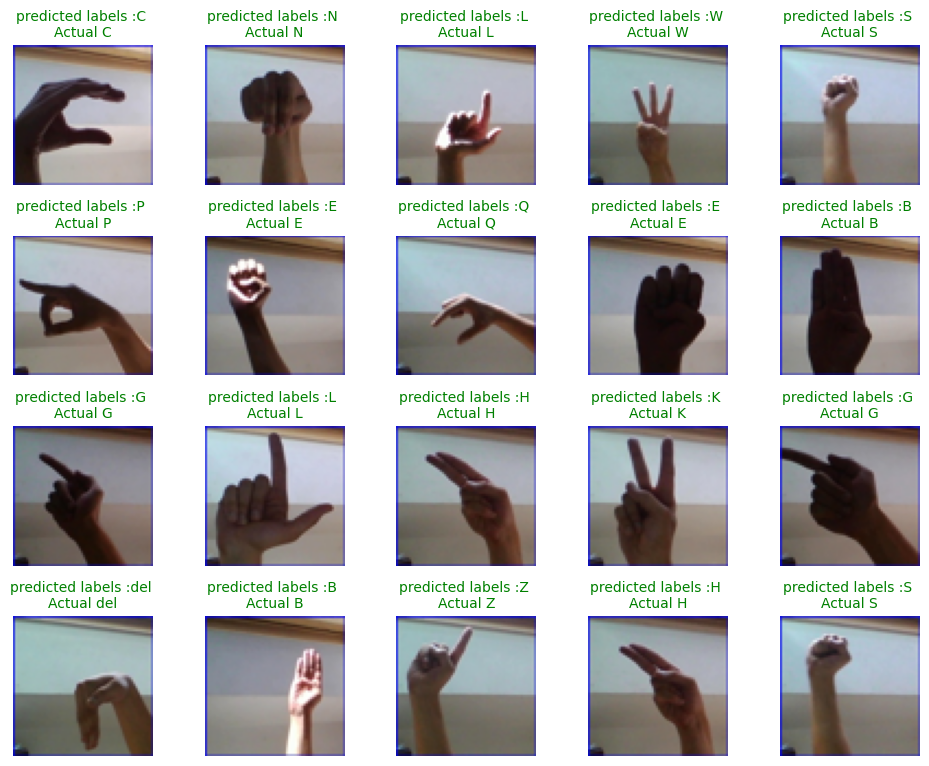

In [62]:
plt.figure(figsize=(10,8))
for i in range(20):
    color = 'green' if decoded[i] == actual[i] else 'red'
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    plt.title(f'predicted labels :{decoded[i]} \nActual {actual[i]}', color = color, fontsize = 10)
    plt.tight_layout()
    plt.axis('off')

In [63]:
model.save('sign_name.h5')